In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import numpy as np

In [147]:
red_df = pd.read_excel("../datasets/cleaned_red_wine.xlsx")
white_df = pd.read_excel("../datasets/cleaned_white_wine.xlsx")
combined_df = pd.read_excel("../datasets/combined_wine_data.xlsx")

dfs = [red_df, white_df, combined_df]

##### Explore the features of the three data frames separately. Identify the dependent and the independent variables

In [148]:
features = combined_df.columns.drop('quality')
print("Independent variables:", list(features))
print("Dependent variable: quality")

Independent variables: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
Dependent variable: quality


In [149]:
red_df.info()
red_df.shape
red_df.columns
red_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1124 non-null   float64
 1   volatile acidity      1124 non-null   float64
 2   citric acid           1124 non-null   float64
 3   residual sugar        1124 non-null   float64
 4   chlorides             1124 non-null   float64
 5   free sulfur dioxide   1124 non-null   int64  
 6   total sulfur dioxide  1124 non-null   int64  
 7   density               1124 non-null   float64
 8   pH                    1124 non-null   float64
 9   sulphates             1124 non-null   float64
 10  alcohol               1124 non-null   float64
 11  quality               1124 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 105.5 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [150]:
white_df.info()
white_df.shape
white_df.columns
white_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3815 non-null   float64
 1   volatile acidity      3815 non-null   float64
 2   citric acid           3815 non-null   float64
 3   residual sugar        3815 non-null   float64
 4   chlorides             3815 non-null   float64
 5   free sulfur dioxide   3815 non-null   float64
 6   total sulfur dioxide  3815 non-null   float64
 7   density               3815 non-null   float64
 8   pH                    3815 non-null   float64
 9   sulphates             3815 non-null   float64
 10  alcohol               3815 non-null   float64
 11  quality               3815 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 357.8 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [151]:
combined_df.info()
combined_df.shape
combined_df.columns
combined_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4939 non-null   float64
 1   volatile acidity      4939 non-null   float64
 2   citric acid           4939 non-null   float64
 3   residual sugar        4939 non-null   float64
 4   chlorides             4939 non-null   float64
 5   free sulfur dioxide   4939 non-null   float64
 6   total sulfur dioxide  4939 non-null   float64
 7   density               4939 non-null   float64
 8   pH                    4939 non-null   float64
 9   sulphates             4939 non-null   float64
 10  alcohol               4939 non-null   float64
 11  quality               4939 non-null   int64  
 12  type                  4939 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 501.7+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [152]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,8.143950,0.522678,0.24508,2.179537,0.078376,14.812278,41.104093,0.996577,3.325667,0.627580,10.342823,5.622776
std,1.444876,0.164194,0.17996,0.437907,0.013766,8.583848,24.661787,0.001559,0.130154,0.111864,0.947403,0.723635
min,5.100000,0.120000,0.00000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.08000,1.900000,0.069750,8.000000,22.000000,0.995520,3.237500,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.24000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.39000,2.400000,0.087000,20.000000,54.000000,0.997500,3.402500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.73000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,7.000000


In [153]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000
mean,6.813460,0.263647,0.322446,6.366999,0.042423,34.702359,137.330013,0.993894,3.187691,0.481942,10.556351,5.879423
std,0.737631,0.075897,0.083689,4.919839,0.009875,15.015001,41.244259,0.002866,0.137928,0.098186,1.194168,0.753690
min,4.800000,0.080000,0.110000,0.600000,0.015000,2.000000,21.000000,0.987110,2.820000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991625,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.042000,34.000000,133.000000,0.993600,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.310000,0.370000,9.625000,0.049000,45.000000,167.000000,0.995900,3.280000,0.540000,11.400000,6.000000
max,8.800000,0.485000,0.540000,20.800000,0.071000,79.000000,253.000000,1.001960,3.570000,0.760000,14.200000,7.000000


In [154]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,7.116248,0.322597,0.304839,5.414031,0.050605,30.175845,115.431261,0.994505,3.219091,0.515086,10.507757,5.821016
std,1.098302,0.149591,0.117589,4.671387,0.018593,16.138372,55.499570,0.002857,0.147964,0.118411,1.146115,0.754597
min,4.800000,0.080000,0.000000,0.600000,0.015000,1.000000,6.000000,0.987110,2.820000,0.220000,8.400000,4.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,17.000000,79.000000,0.992100,3.120000,0.430000,9.500000,5.000000
50%,6.900000,0.280000,0.300000,2.900000,0.046000,29.000000,117.000000,0.994740,3.210000,0.500000,10.400000,6.000000
75%,7.600000,0.370000,0.370000,8.100000,0.058000,41.000000,155.000000,0.996740,3.320000,0.590000,11.300000,6.000000
max,12.300000,1.005000,0.730000,20.800000,0.116000,79.000000,253.000000,1.001960,3.680000,0.940000,14.200000,7.000000


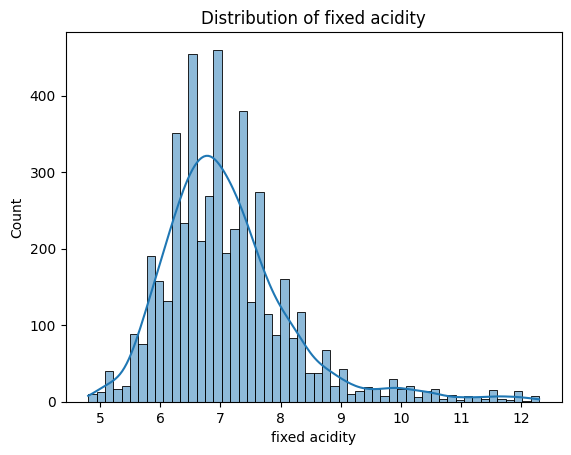

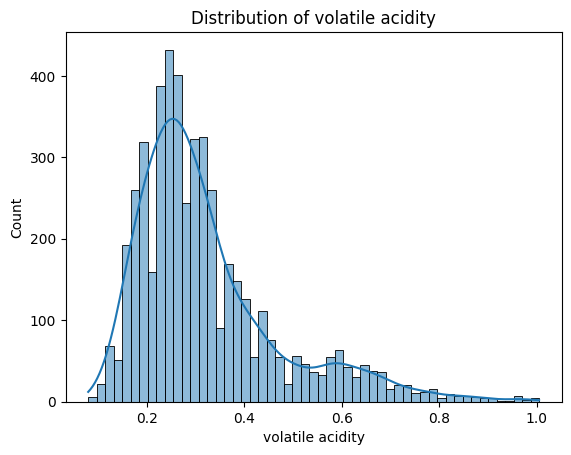

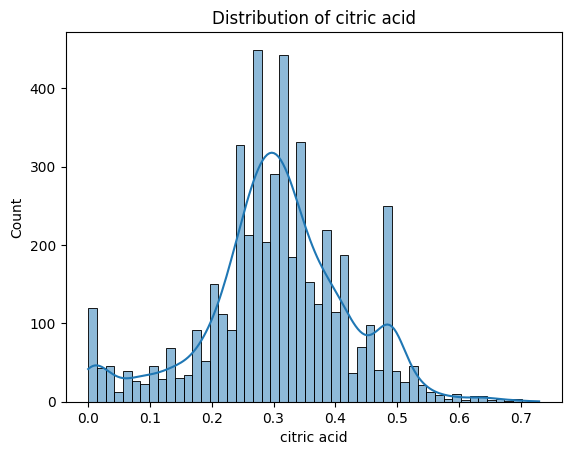

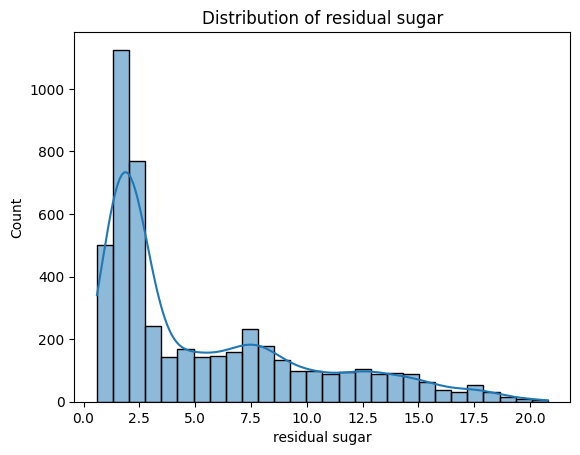

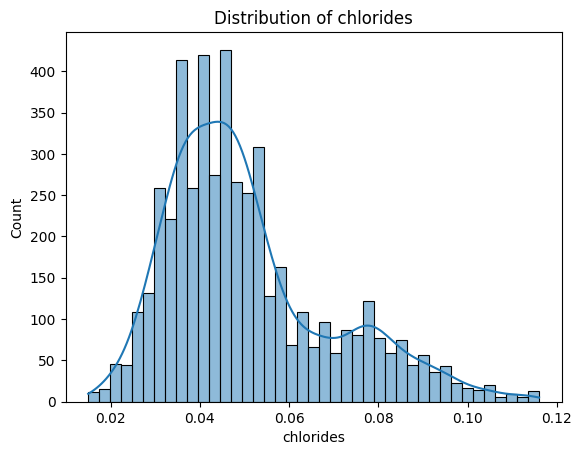

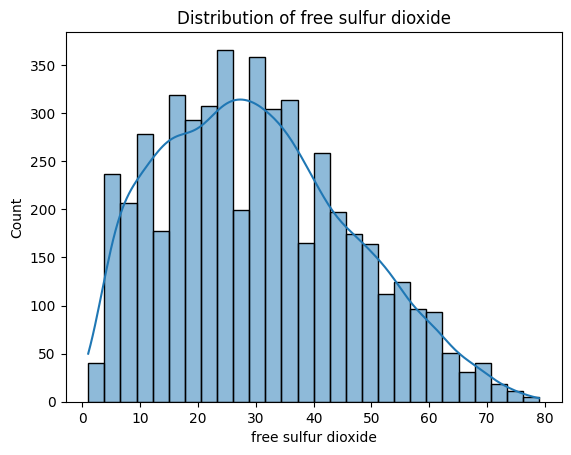

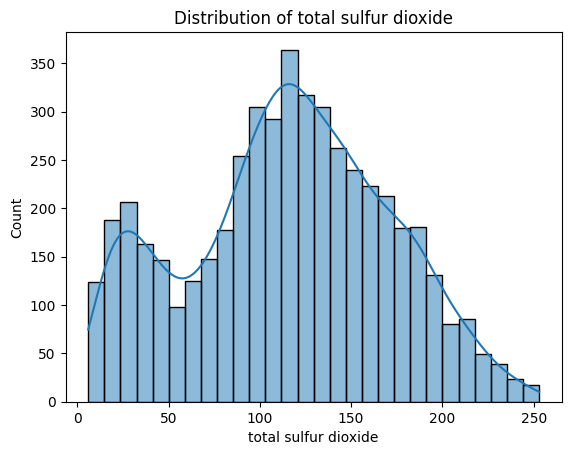

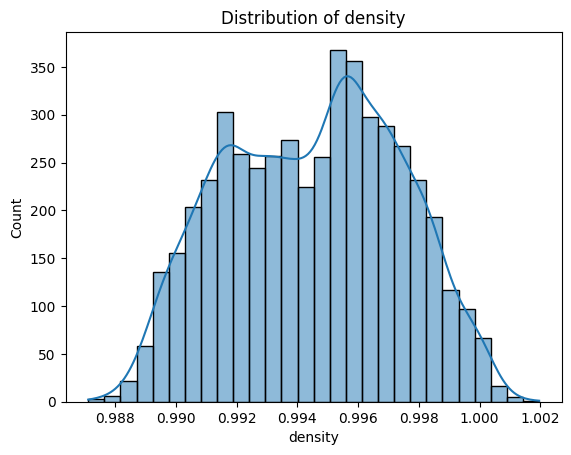

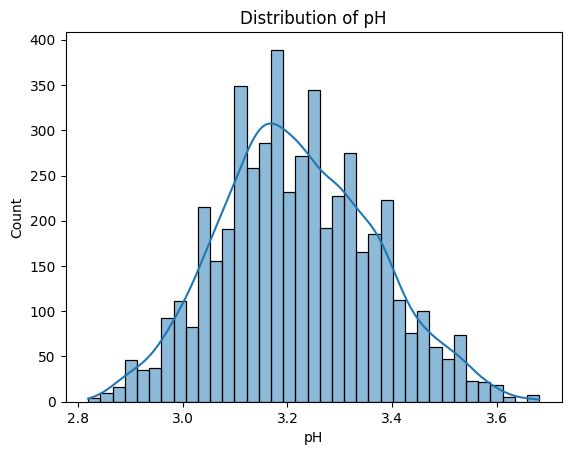

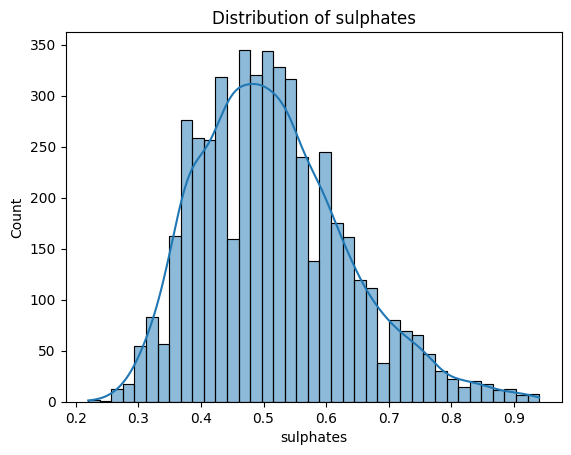

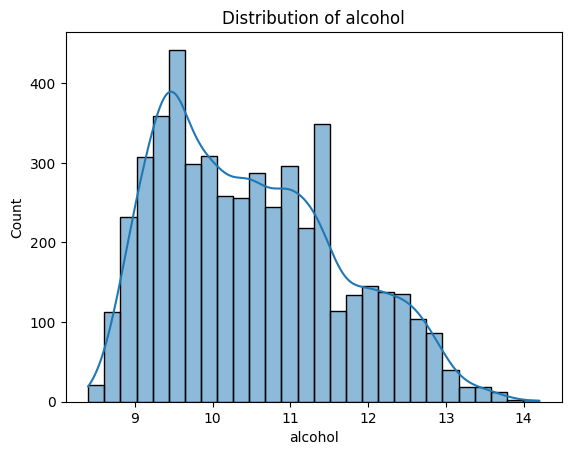

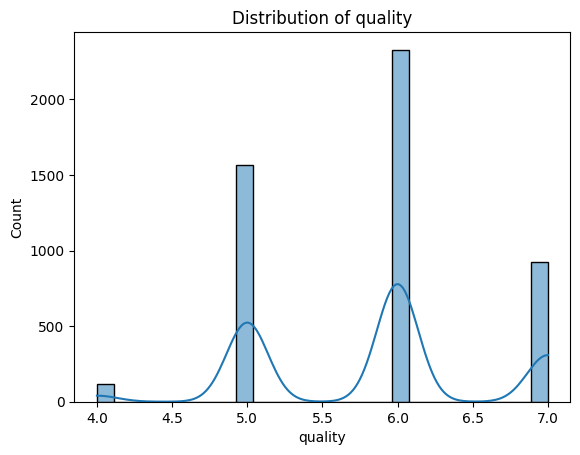

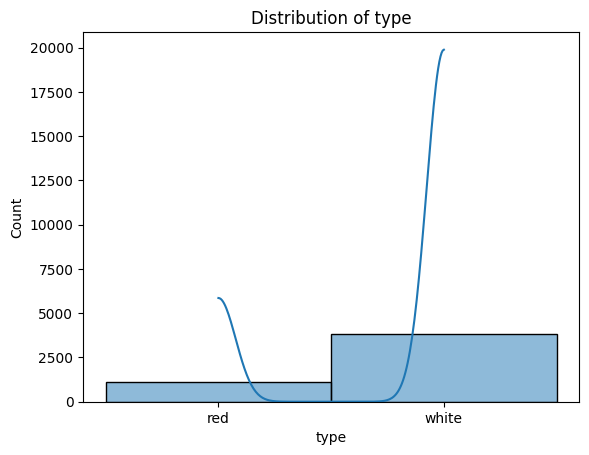

In [155]:
for col in combined_df.columns:
    plt.figure()
    sbn.histplot(combined_df[col], kde=True)
    plt.title(f"Distribution of {col}")


##### Transform the categorical data into numeric, applying appropriate encoding methods.

In [156]:
label_encoder = preprocessing.LabelEncoder()

combined_df['type'] = label_encoder.fit_transform(combined_df['type'])

combined_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4935,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4936,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4937,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


##### Calculate the descriptive statistics of the numeric data. Check whether the distribution of the values of the attributes is normal.

In [157]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,7.116248,0.322597,0.304839,5.414031,0.050605,30.175845,115.431261,0.994505,3.219091,0.515086,10.507757,5.821016,0.772424
std,1.098302,0.149591,0.117589,4.671387,0.018593,16.138372,55.499570,0.002857,0.147964,0.118411,1.146115,0.754597,0.419310
min,4.800000,0.080000,0.000000,0.600000,0.015000,1.000000,6.000000,0.987110,2.820000,0.220000,8.400000,4.000000,0.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,17.000000,79.000000,0.992100,3.120000,0.430000,9.500000,5.000000,1.000000
50%,6.900000,0.280000,0.300000,2.900000,0.046000,29.000000,117.000000,0.994740,3.210000,0.500000,10.400000,6.000000,1.000000
75%,7.600000,0.370000,0.370000,8.100000,0.058000,41.000000,155.000000,0.996740,3.320000,0.590000,11.300000,6.000000,1.000000
max,12.300000,1.005000,0.730000,20.800000,0.116000,79.000000,253.000000,1.001960,3.680000,0.940000,14.200000,7.000000,1.000000


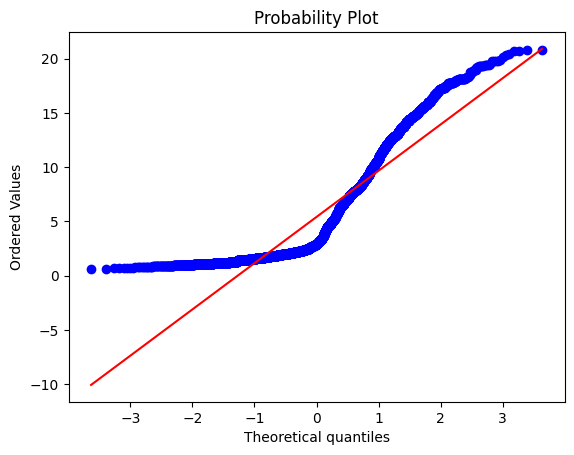

In [158]:
stats.probplot(combined_df['residual sugar'], dist="norm", plot=plt)
plt.show()


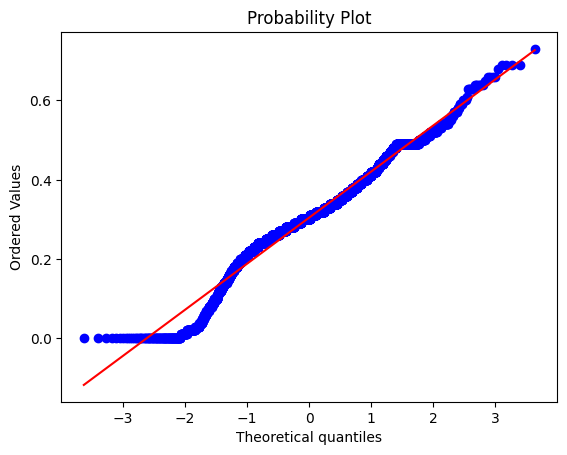

In [159]:
stats.probplot(combined_df['citric acid'], dist="norm", plot=plt)
plt.show()

##### Plot diagrams that visualize the differences in red and white wine samples. Use as many diagrams as appropriate. Use the diagrams as a support for answering the following questions:

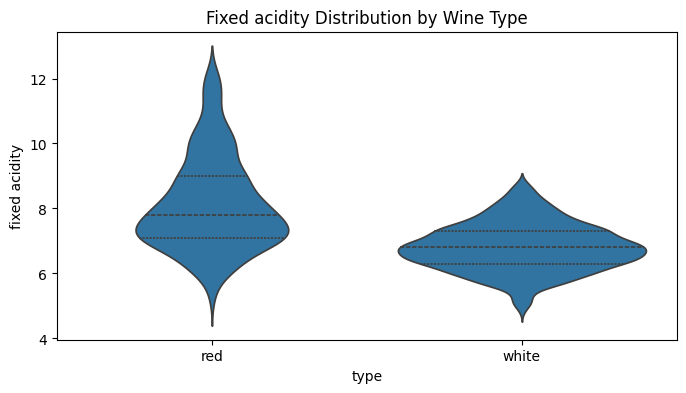

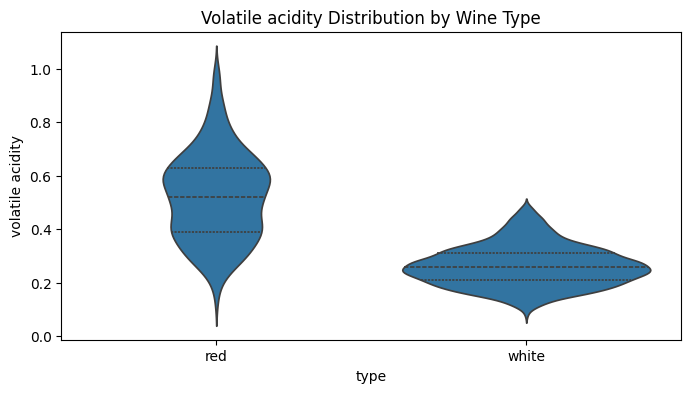

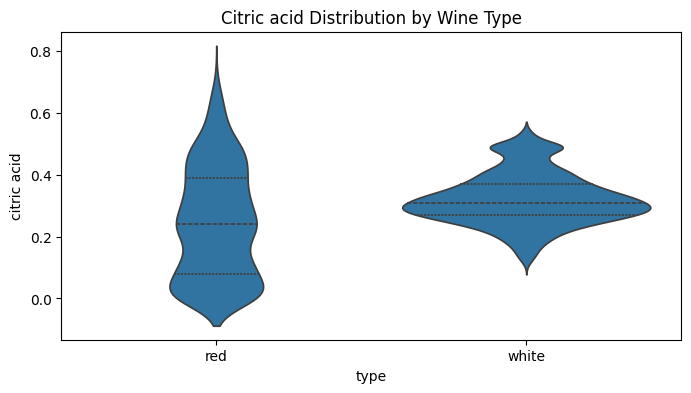

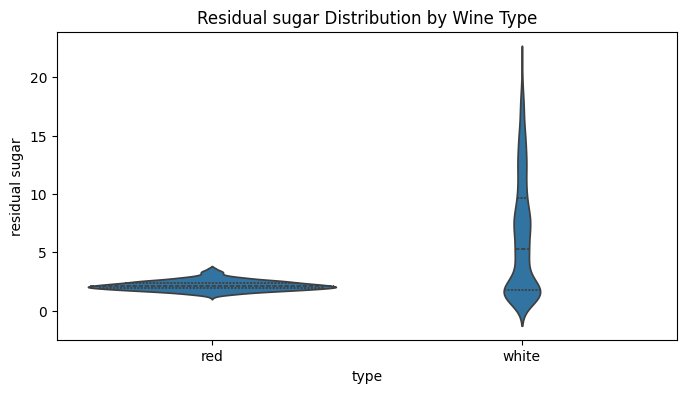

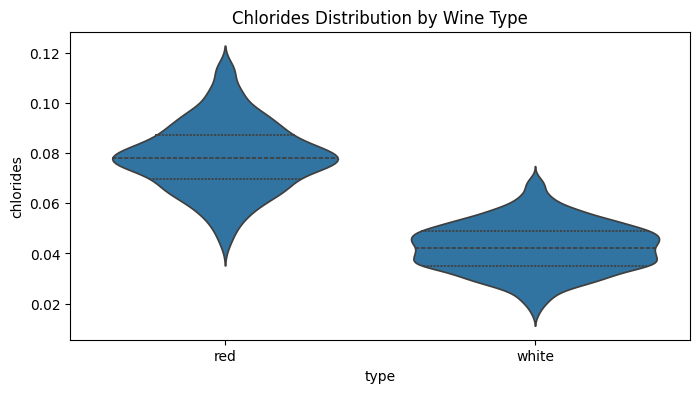

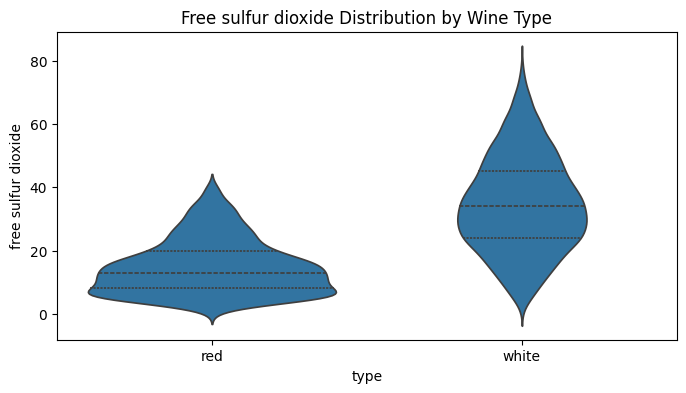

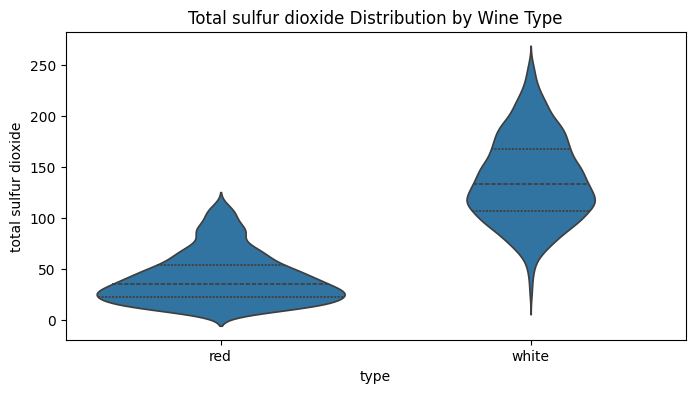

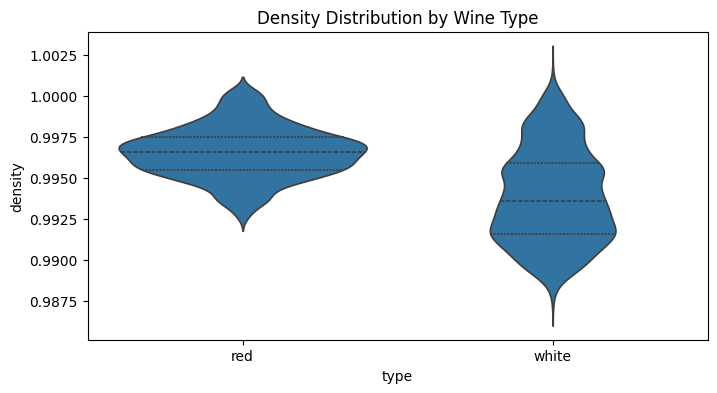

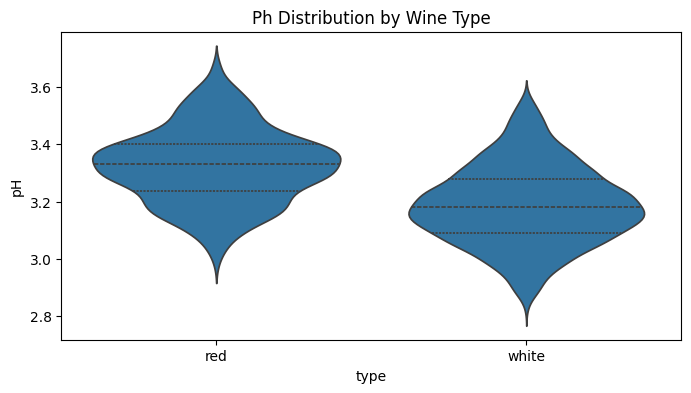

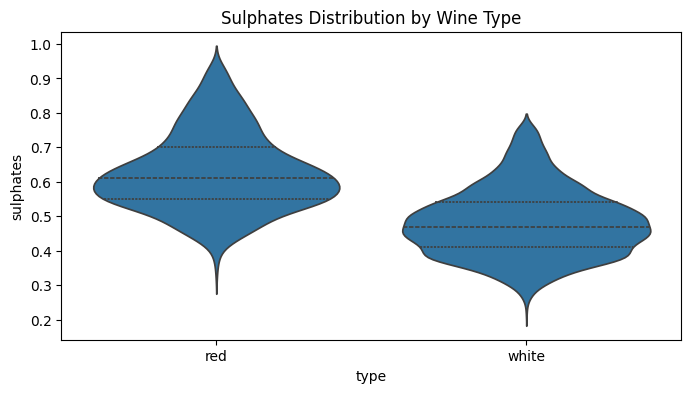

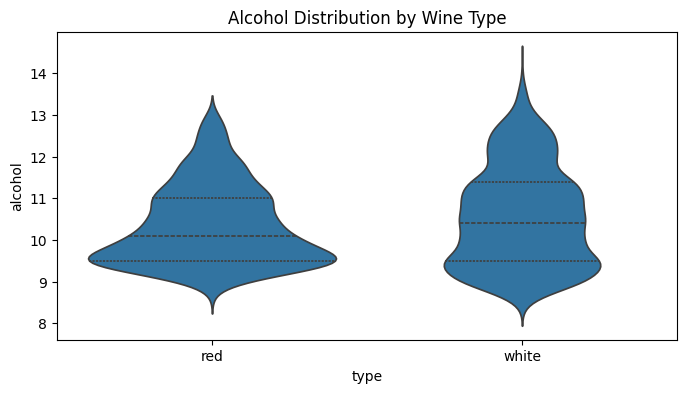

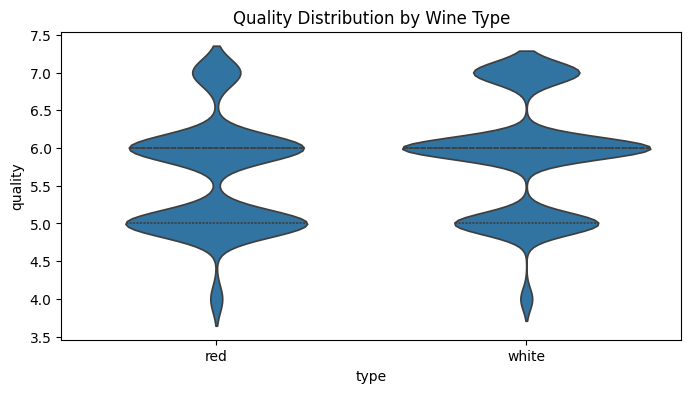

In [160]:
combined_df['type'] = combined_df['type'].map({0: 'red', 1: 'white'})

for col in combined_df:
    if col == 'type':
        break
    plt.figure(figsize=(8, 4))
    sbn.violinplot(data=combined_df, x='type', y=col, inner='quartile')
    plt.title(f'{col.capitalize()} Distribution by Wine Type')
    plt.show()

combined_df['type'] = label_encoder.fit_transform(combined_df['type'])


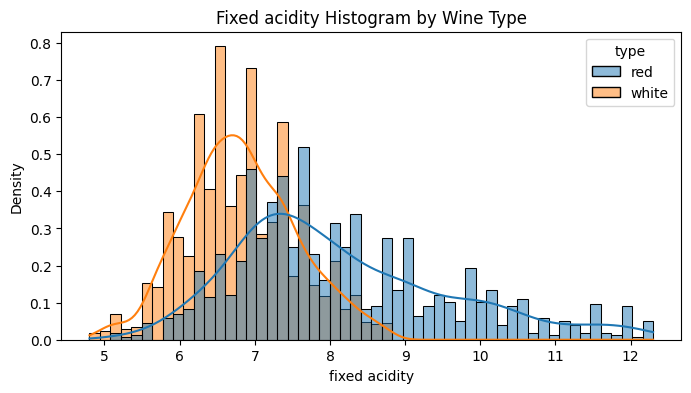

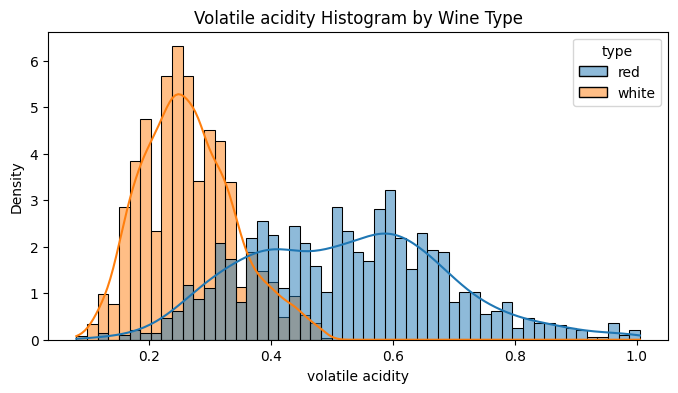

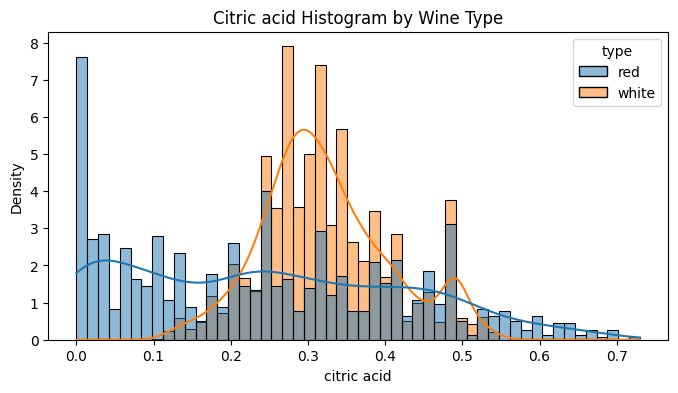

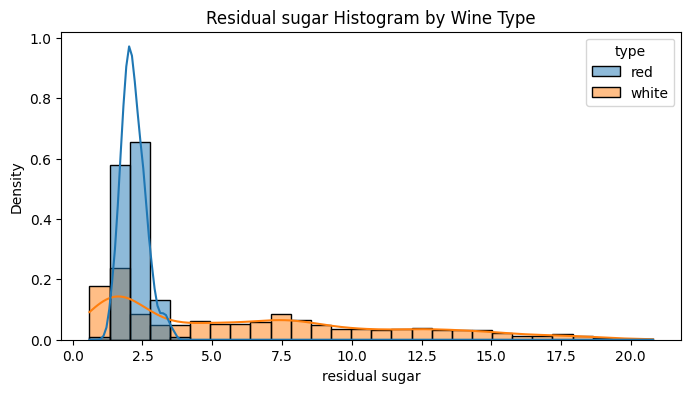

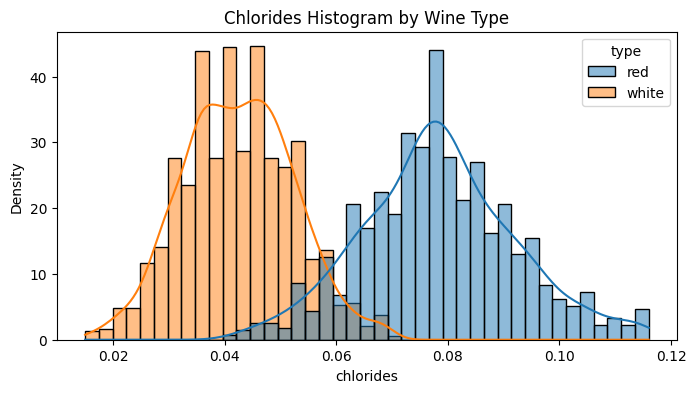

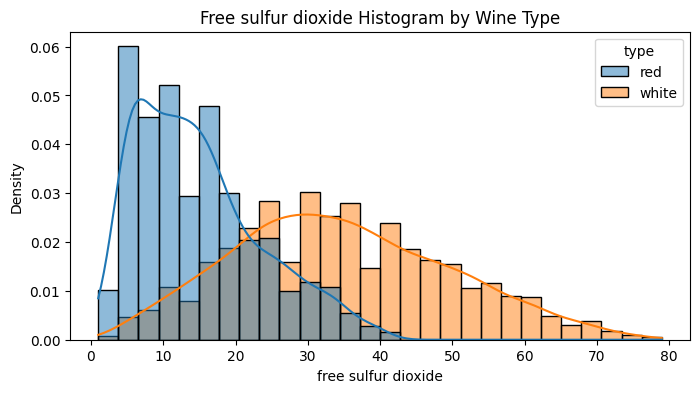

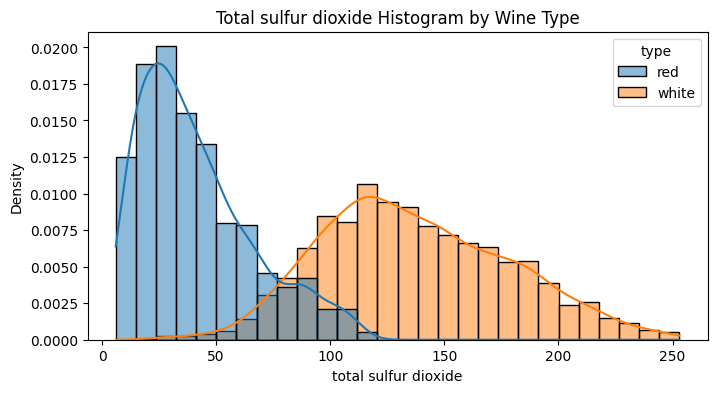

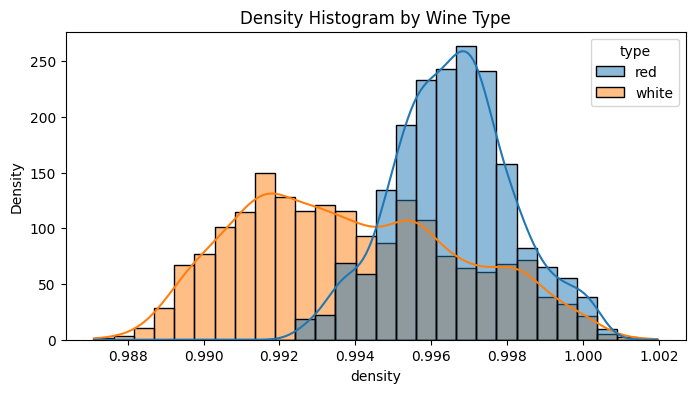

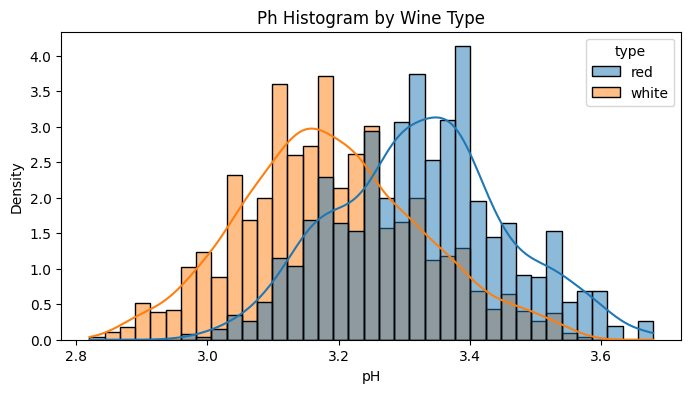

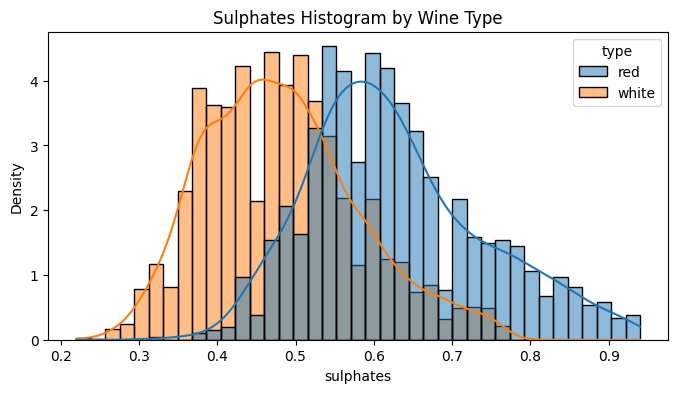

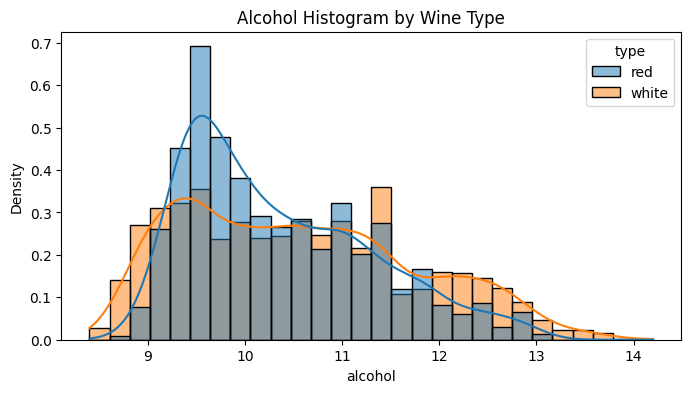

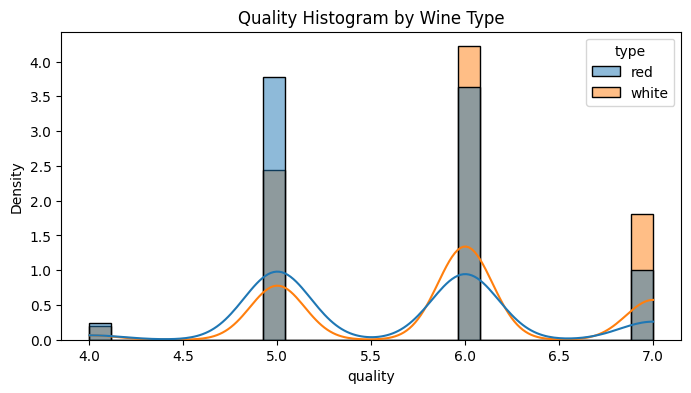

In [161]:
combined_df['type'] = combined_df['type'].map({0: 'red', 1: 'white'})

for col in combined_df:
    if col == 'type':
        break
    plt.figure(figsize=(8, 4))
    sbn.histplot(data=combined_df, x=col, hue='type', kde=True, stat='density', common_norm=False)
    plt.title(f'{col.capitalize()} Histogram by Wine Type')
    plt.show()
    
combined_df['type'] = label_encoder.fit_transform(combined_df['type'])

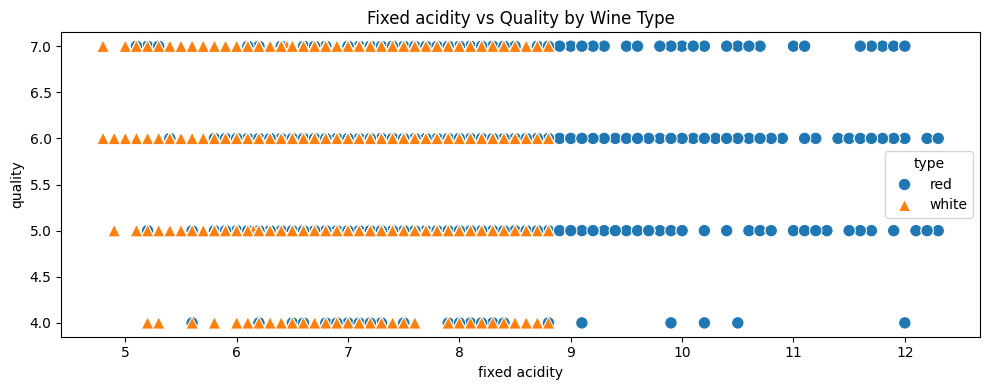

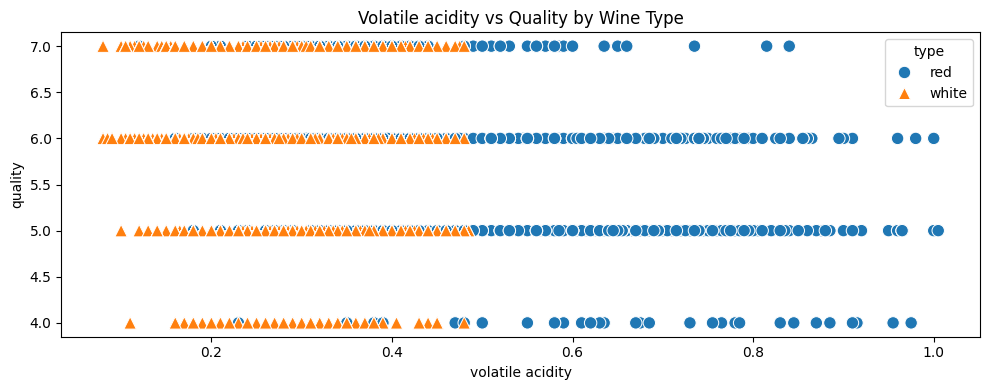

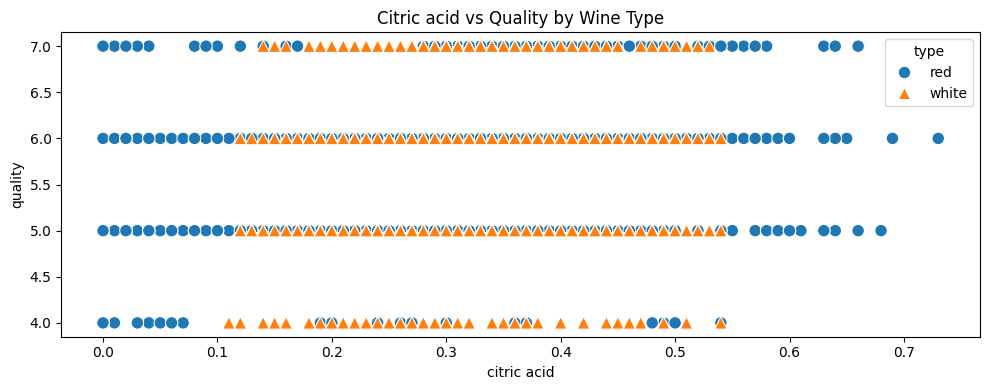

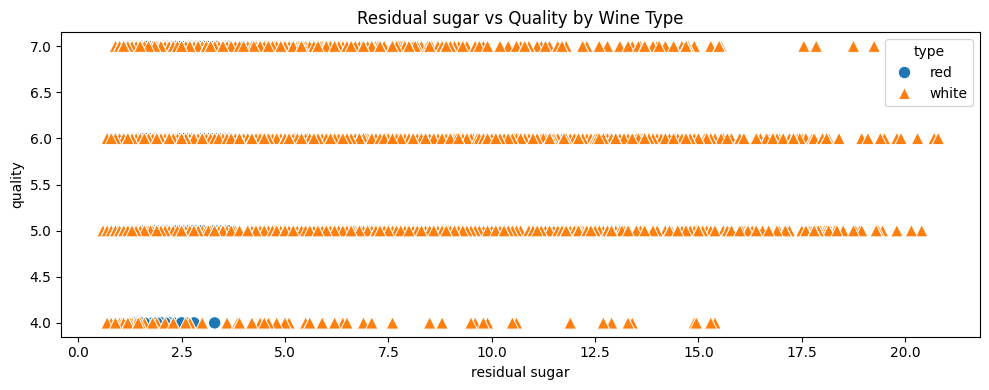

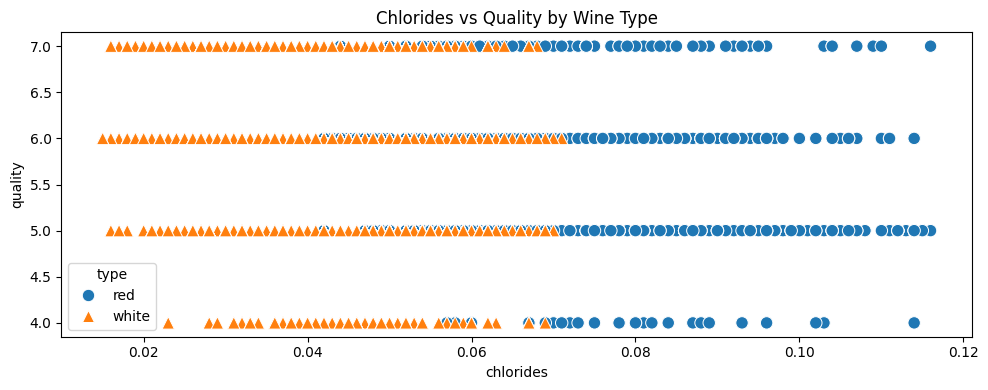

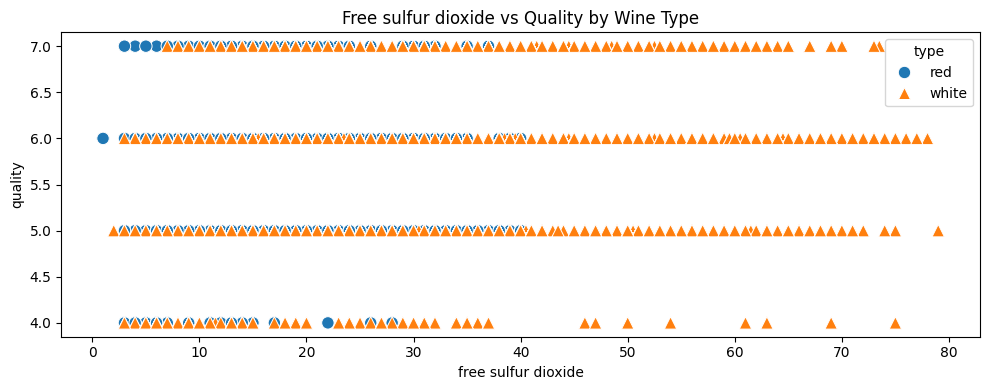

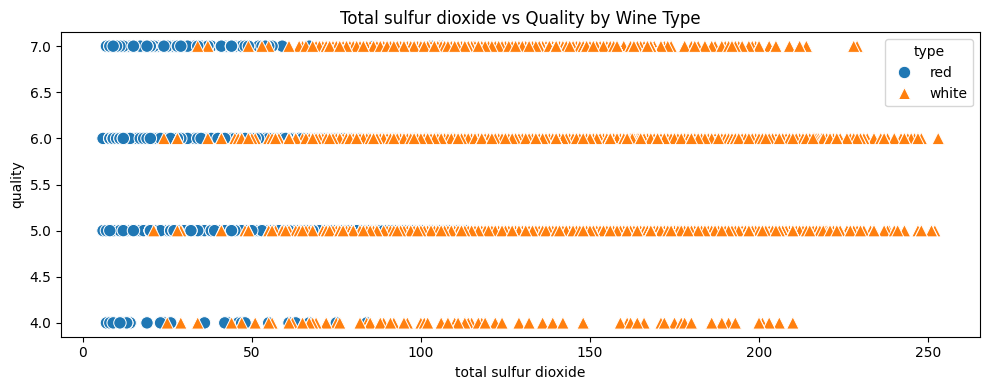

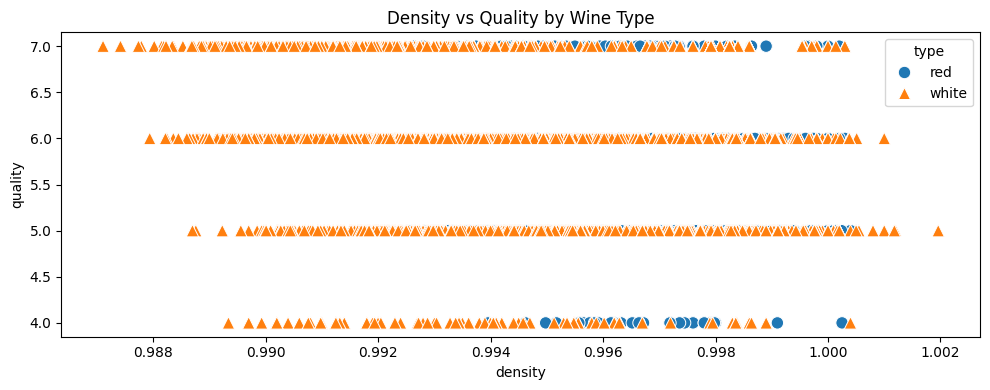

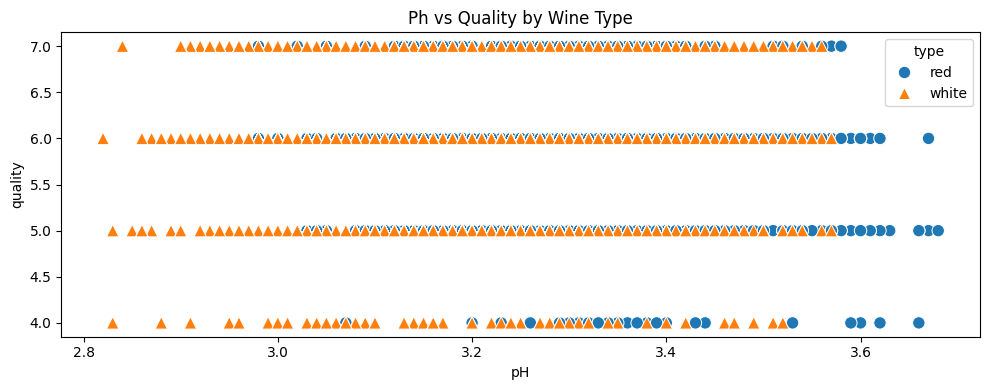

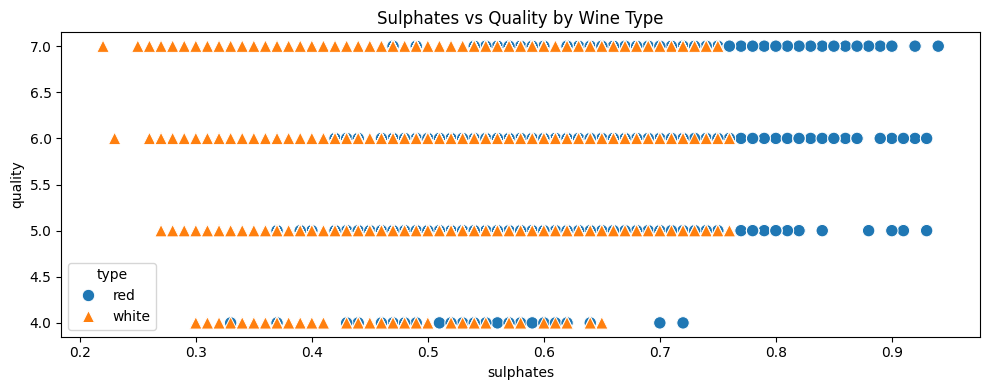

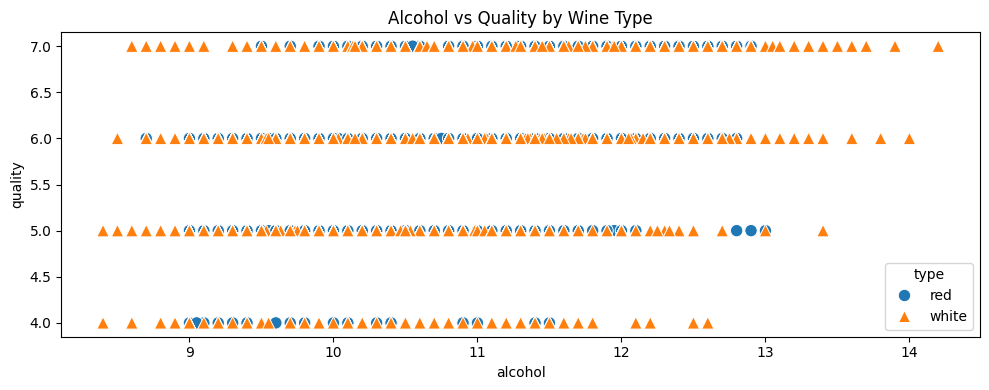

In [162]:
combined_df['type'] = combined_df['type'].map({0: 'red', 1: 'white'})

for column in combined_df:
    if column not in ['type', 'quality']:  # We fix y='quality'
        plt.figure(figsize=(10, 4))
        sbn.scatterplot(
            data=combined_df,
            x=column,
            y='quality',
            hue='type',
            style='type',
            markers=['o', '^'],
            s=80
        )
        plt.title(f'{column.capitalize()} vs Quality by Wine Type')
        plt.tight_layout()
        plt.show()

combined_df['type'] = label_encoder.fit_transform(combined_df['type'])


##### Which type of wine has higher average quality, how big is the difference?

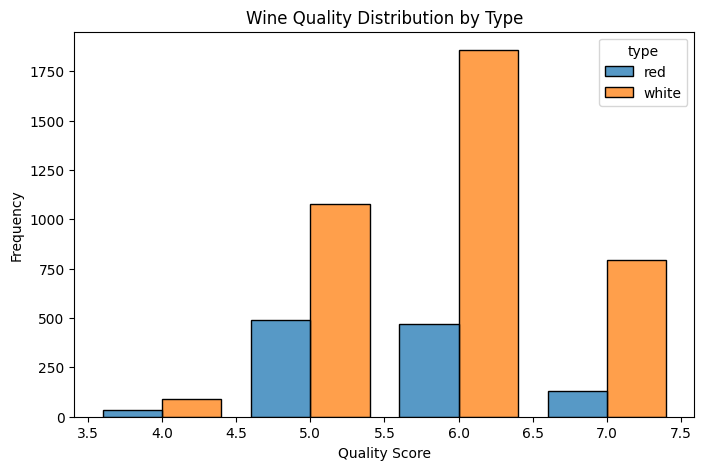

In [163]:
combined_df['type'] = combined_df['type'].map({0: 'red', 1: 'white'})

plt.figure(figsize=(8, 5))

sbn.histplot(
    data=combined_df,
    x='quality',
    hue='type',
    multiple='dodge',    # puts bars side by side
    shrink=0.8,          # narrows the bars a bit
    discrete=True        # treat quality as discrete values
)

plt.title('Wine Quality Distribution by Type')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

combined_df['type'] = label_encoder.fit_transform(combined_df['type'])

In [164]:
avg_red_wine_quality = red_df['quality'].mean()
avg_white_wine_quality = white_df['quality'].mean()
print('Avg red wine quality:',avg_red_wine_quality)
print('Avg white wine quality:',avg_white_wine_quality)


Avg red wine quality: 5.622775800711744
Avg white wine quality: 5.879423328964613


##### which type of wine has higher average level of alcohol?

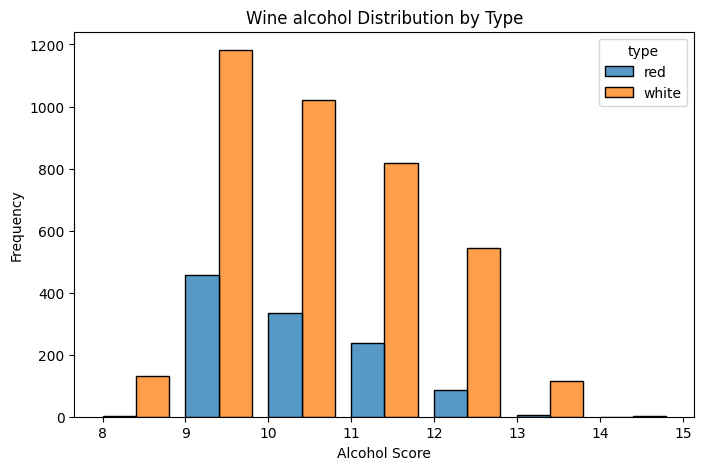

In [165]:
combined_df['type'] = combined_df['type'].map({0: 'red', 1: 'white'})

plt.figure(figsize=(8, 5))

sbn.histplot(
    data=combined_df,
    x='alcohol',
    hue='type',
    multiple='dodge',    # puts bars side by side
    shrink=0.8,          # narrows the bars a bit
    discrete=True        # treat quality as discrete values
)

plt.title('Wine alcohol Distribution by Type')
plt.xlabel('Alcohol Score')
plt.ylabel('Frequency')
plt.show()

combined_df['type'] = label_encoder.fit_transform(combined_df['type'])

In [166]:
avg_red_wine_alcohol = red_df['alcohol'].mean()
avg_white_wine_alcohol = white_df['alcohol'].mean()
print('Avg red wine alcohol:',avg_red_wine_alcohol)
print('Avg white wine alcohol:',avg_white_wine_alcohol)

Avg red wine alcohol: 10.34282325029656
Avg white wine alcohol: 10.556351245085189


##### which one has higher average quantity of residual sugar?

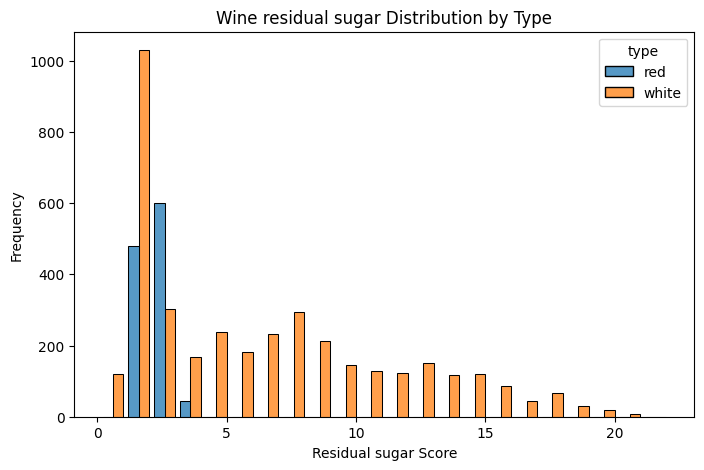

In [169]:
combined_df['type'] = combined_df['type'].map({0: 'red', 1: 'white'})

plt.figure(figsize=(8, 5))

sbn.histplot(
    data=combined_df,
    x='residual sugar',
    hue='type',
    multiple='dodge',    # puts bars side by side
    shrink=0.8,          # narrows the bars a bit
    discrete=True        # treat quality as discrete values
)

plt.title('Wine residual sugar Distribution by Type')
plt.xlabel('Residual sugar Score')
plt.ylabel('Frequency')
plt.show()

combined_df['type'] = label_encoder.fit_transform(combined_df['type'])

In [168]:
avg_red_wine_sugar = red_df['residual sugar'].mean()
avg_white_wine_sugar = white_df['residual sugar'].mean()
print('Average residual sugar in red wine:', avg_red_wine_sugar)
print('Average residual sugar in white wine:', avg_white_wine_sugar)

Average residual sugar in red wine: 2.179537366548043
Average residual sugar in white wine: 6.36699868938401


##### do the quantity of alcohol and residual sugar influence the quality of the wine?

In [170]:
print("Correlation with quality:")
print("Alcohol:", combined_df['alcohol'].corr(combined_df['quality']))
print("Residual sugar:", combined_df['residual sugar'].corr(combined_df['quality']))

Correlation with quality:
Alcohol: 0.43162641785871847
Residual sugar: -0.04466696696431995


##### Discuss which other questions might be of interest for the wine consumers and which of wine distributers.

##### 👤 Wine Consumers

Wine consumers are primarily concerned with **taste, quality, health, and purchasing decisions**. They might be interested in:

- **Which wine type (red or white) has higher average quality?**  
  → Helps in choosing better wines.

- **Is there a relationship between alcohol content and wine quality?**  
  → To understand if stronger wines tend to be rated better.

- **How much residual sugar do red and white wines typically contain?**  
  → Important for health-conscious buyers (e.g., low sugar diets).

- **Which chemical features (e.g., acidity, sulphates) correlate with quality?**  
  → Helps identify better wines by label information.

- **Do higher quality wines tend to be red or white?**  
  → Affects preference and brand loyalty.

---

### 📦 Wine Distributors and Producers

Distributors and producers are more focused on **production efficiency, quality control, and market trends**. They may explore:

- **Which features most strongly influence wine quality?**  
  → Focus on enhancing those during production.

- **Is alcohol content a key marketing or pricing factor?**  
  → To guide labeling and pricing strategy.

- **Can wines be grouped by pH, sugar level, or sulphates for market segmentation?**  
  → Helps target different consumer groups more effectively.

- **Which combinations of features lead to high-quality wines at low cost?**  
  → Useful for maximizing profit margins.

- **Are there any redundant or highly correlated features?**  
  → Could simplify lab testing and reduce costs.

---

### 🎯 Summary

| Audience       | Focus Areas                                               |
|----------------|------------------------------------------------------------|
| **Consumers**   | Taste, alcohol, sugar, quality ratings, wine type         |
| **Distributors**| Quality drivers, segmentation, production efficiency, cost |

---

##### Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest density? What if you split the data in ten subsets?

In [172]:
combined_df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.28, 3.58, 3.52, 3.17,
       3.43, 3.34, 3.47, 3.38, 3.35, 3.46, 3.42, 3.23, 3.48, 3.25, 3.32,
       3.15, 3.4 , 3.04, 3.41, 3.44, 3.21, 3.31, 3.54, 3.45, 3.29, 3.33,
       3.37, 3.19, 3.07, 3.49, 3.63, 3.53, 3.59, 3.57, 3.22, 3.24, 3.14,
       3.08, 3.6 , 3.12, 3.1 , 3.05, 3.67, 3.68, 3.27, 3.18, 3.13, 3.11,
       3.55, 3.62, 3.  , 3.06, 3.5 , 2.98, 3.09, 3.56, 3.03, 3.61, 3.66,
       3.02, 2.99, 2.95, 2.94, 3.01, 2.89, 2.93, 2.96, 2.97, 2.86, 2.88,
       2.85, 2.92, 2.91, 2.84, 2.9 , 2.87, 2.83, 2.82])

In [ ]:
import numpy as np

data = combined_df['pH']

# Automatically create 5 bins between min and max pH
bin_edges = np.linspace(data.min(), data.max(), num=6)  # 5 bins = 6 edges

hist, bins = np.histogram(data, bins=bin_edges)

print("Bin Edges:", bins)
print("Histogram Counts:", hist)


Bin Edges: [2.82  2.992 3.164 3.336 3.508 3.68 ]
Histogram Counts: [ 295 1595 1931  946  172]


In [199]:
import numpy as np

data = combined_df['pH']

# Automatically create 5 bins between min and max pH
bin_edges = np.linspace(data.min(), data.max(), num=11)  # 5 bins = 6 edges

hist, bins = np.histogram(data, bins=bin_edges)

print("Bin Edges:", bins)
print("Histogram Counts:", hist)


Bin Edges: [2.82  2.906 2.992 3.078 3.164 3.25  3.336 3.422 3.508 3.594 3.68 ]
Histogram Counts: [  66  229  511 1084 1010  921  686  260  148   24]


##### Create a correlation matrix and a heat map of all data and investigate it.

In [204]:
for column in combined_df:
    corr = np.corrcoef(combined_df[column], combined_df['quality'])
    print(f'correlation matrix between {column} and quality: {corr[0]}')

correlation matrix between fixed acidity and quality: [ 1.         -0.07107812]
correlation matrix between volatile acidity and quality: [ 1.         -0.23954683]
correlation matrix between citric acid and quality: [1.         0.12752829]
correlation matrix between residual sugar and quality: [ 1.         -0.04466697]
correlation matrix between chlorides and quality: [ 1.       -0.259988]
correlation matrix between free sulfur dioxide and quality: [1.         0.07029121]
correlation matrix between total sulfur dioxide and quality: [ 1.         -0.01887436]
correlation matrix between density and quality: [ 1.         -0.31637508]
correlation matrix between pH and quality: [ 1.        -0.0190691]
correlation matrix between sulphates and quality: [1.         0.03677523]
correlation matrix between alcohol and quality: [1.         0.43162642]
correlation matrix between quality and quality: [1. 1.]
correlation matrix between type and quality: [1.         0.14261245]


In [208]:
for col1 in combined_df.columns:
    for col2 in combined_df.columns:
        corr = np.corrcoef(combined_df[col1], combined_df[col2])
        print(f'correlation matrix between {col1} and {col2}: {corr[0]}')

correlation matrix between fixed acidity and fixed acidity: [1. 1.]
correlation matrix between fixed acidity and volatile acidity: [1.         0.27171916]
correlation matrix between fixed acidity and citric acid: [1.         0.25452306]
correlation matrix between fixed acidity and residual sugar: [ 1.         -0.14919386]
correlation matrix between fixed acidity and chlorides: [1.         0.47527754]
correlation matrix between fixed acidity and free sulfur dioxide: [ 1.         -0.30030212]
correlation matrix between fixed acidity and total sulfur dioxide: [ 1.         -0.34998711]
correlation matrix between fixed acidity and density: [1.         0.41398554]
correlation matrix between fixed acidity and pH: [ 1.         -0.16959934]
correlation matrix between fixed acidity and sulphates: [1.         0.30414893]
correlation matrix between fixed acidity and alcohol: [ 1.         -0.08794718]
correlation matrix between fixed acidity and quality: [ 1.         -0.07107812]
correlation matrix

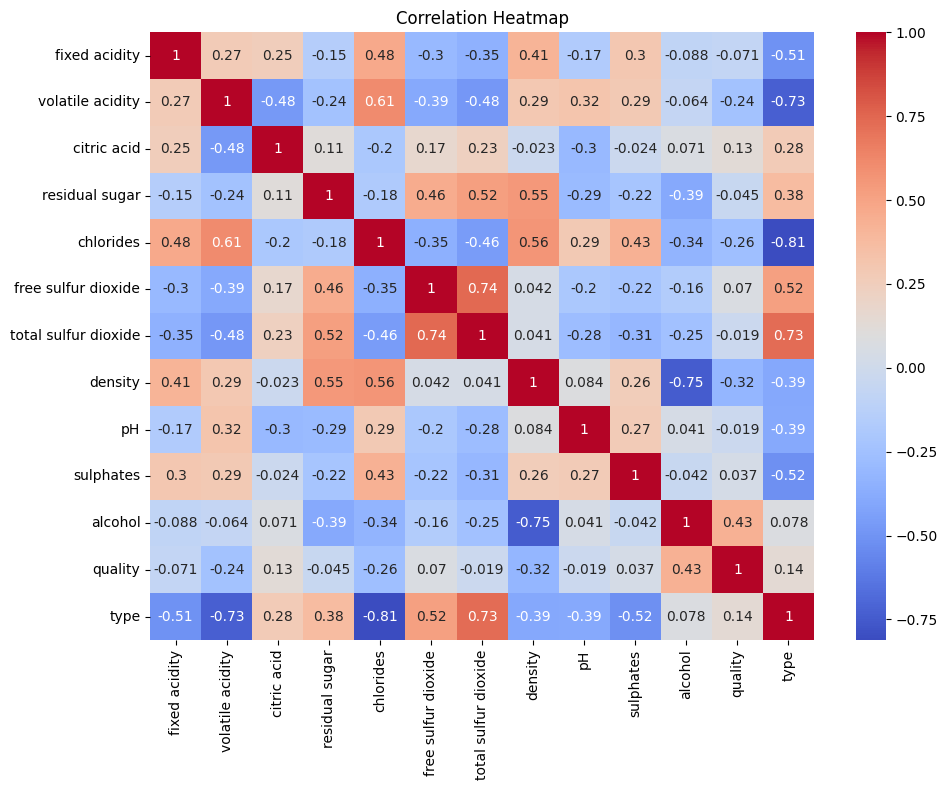

In [224]:
import seaborn as sbn
import matplotlib.pyplot as plt

# 1. Compute correlation matrix
corr_matrix = combined_df.corr(numeric_only=True)

# 2. Plot heatmap
plt.figure(figsize=(10, 8))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
